
Este conjunto de dados é sobre a Netflix é o maior provedor de serviços de streaming online do mundo, com mais de 220 milhões de assinantes no segundo trimestre de 2022. Neste projeto será feito, uma análise exploratória, e modelo de machine learning de clusterização, utilizando o algoritmo de kmeans, para agrupar os programas da Netflix em determinados clusters, de modo que os programas dentro de um cluster sejam semelhantes entre si e os programas em diferentes clusters sejam diferentes entre si.

Link dataset: https://www.kaggle.com/datasets/bansodesandeep/netflix-movies-and-tv-shows

In [2]:
import pandas as pd

# Carregando os dados
df = pd.read_csv('/content/drive/MyDrive/Dataset Netflix/Netflix_movies_and_tv_shows_clustering.csv')

# Exibindo as primeiras linhas do dataframe
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


As colunas são as seguintes:

show_id: Identificador único do programa ou filme.

type: Tipo do conteúdo, podendo ser 'TV Show' ou 'Movie'.

title: Título do programa ou filme.

director: Diretor do filme ou programa.

cast: Elenco.

country: País de produção.

date_added: Data em que o conteúdo foi adicionado à Netflix.

release_year: Ano de lançamento do conteúdo.

rating: Classificação indicativa.

duration: Duração do conteúdo.

listed_in: Categorias em que o conteúdo está listado.

description: Descrição do conteúdo.

In [ ]:
df.shape

(7787, 12)

Este conjunto de dados contém 7787 entradas e 12 colunas.

In [ ]:
# Verificando valores ausentes
df.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

In [ ]:
# Obtendo estatísticas descritivas
df.describe()

,release_year
count,7787.000000
mean,2013.932580
std,8.757395
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2018.000000
max,2021.000000


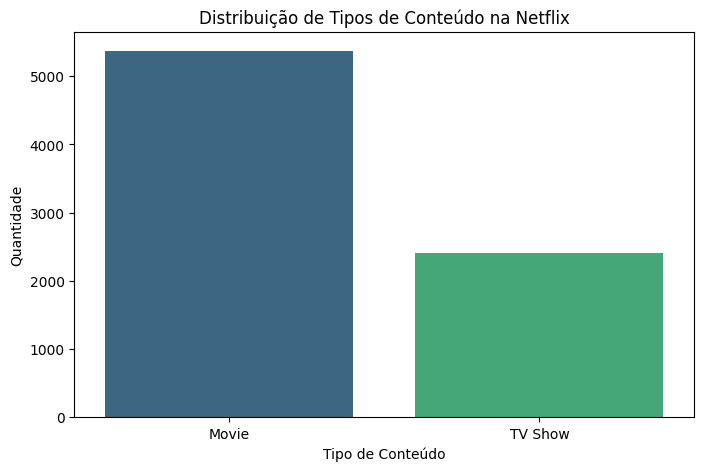

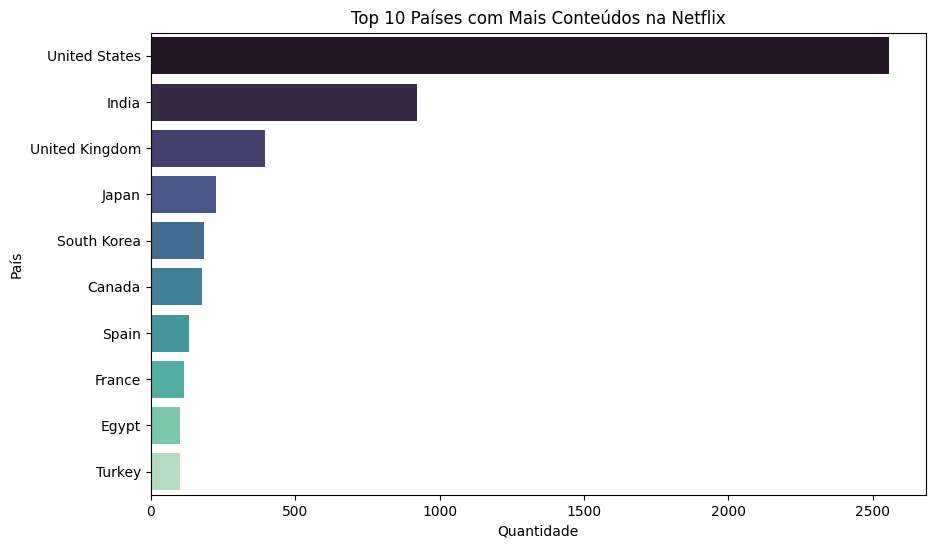

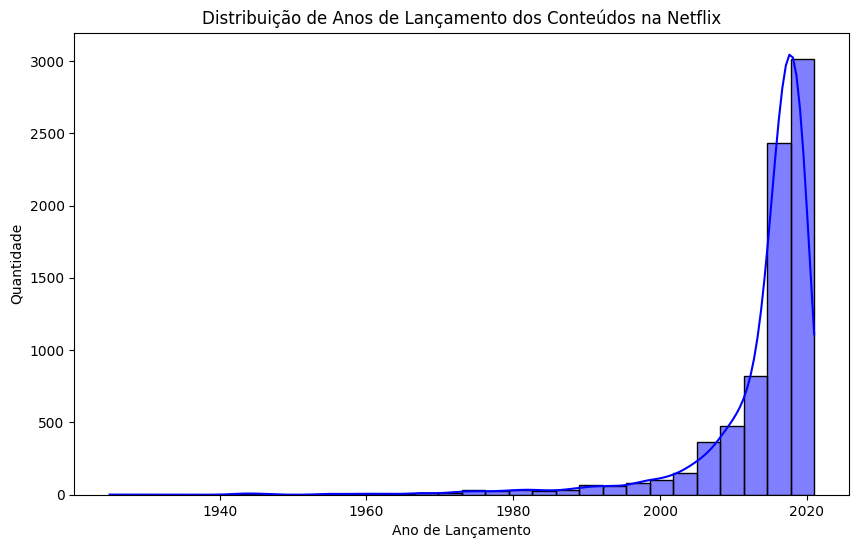

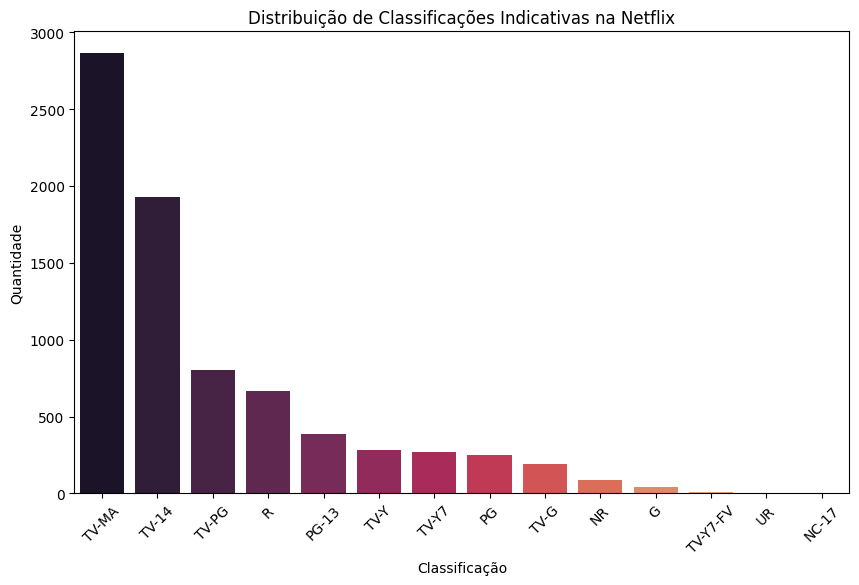

<ipython-input-8-d3e0a1216822>:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_data['duration_num'] = movies_data['duration'].str.replace(' min', '').astype(int)


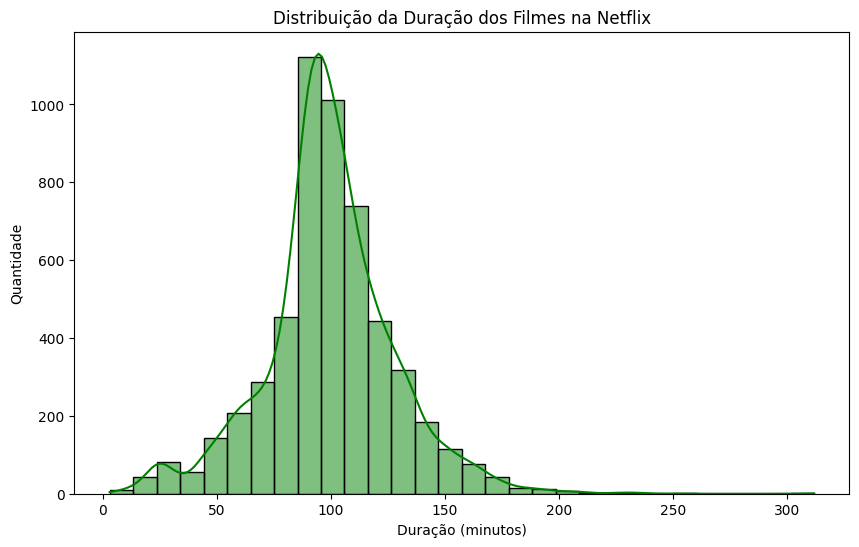

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Distribuição do Tipo de Conteúdo (TV Show vs Movie)
content_type_counts = df['type'].value_counts()
plt.figure(figsize=(8, 5))
sns.barplot(x=content_type_counts.index, y=content_type_counts.values, palette="viridis")
plt.title('Distribuição de Tipos de Conteúdo na Netflix')
plt.xlabel('Tipo de Conteúdo')
plt.ylabel('Quantidade')
plt.show()

# 2. Análise de Conteúdo por País
# Considerando apenas os 10 países com mais conteúdos
top_countries = df['country'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_countries.values, y=top_countries.index, palette="mako")
plt.title('Top 10 Países com Mais Conteúdos na Netflix')
plt.xlabel('Quantidade')
plt.ylabel('País')
plt.show()

# 3. Distribuição do Ano de Lançamento
plt.figure(figsize=(10, 6))
sns.histplot(df['release_year'], bins=30, color='blue', kde=True)
plt.title('Distribuição de Anos de Lançamento dos Conteúdos na Netflix')
plt.xlabel('Ano de Lançamento')
plt.ylabel('Quantidade')
plt.show()

# 4. Classificações Indicativas
ratings_counts = df['rating'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=ratings_counts.index, y=ratings_counts.values, palette="rocket")
plt.title('Distribuição de Classificações Indicativas na Netflix')
plt.xlabel('Classificação')
plt.ylabel('Quantidade')
plt.xticks(rotation=45)
plt.show()

# 5. Duração dos Filmes
# Filtrando apenas filmes
movies_data = df[df['type'] == 'Movie']
# Convertendo a duração para um formato numérico
movies_data['duration_num'] = movies_data['duration'].str.replace(' min', '').astype(int)
plt.figure(figsize=(10, 6))
sns.histplot(movies_data['duration_num'], bins=30, color='green', kde=True)
plt.title('Distribuição da Duração dos Filmes na Netflix')
plt.xlabel('Duração (minutos)')
plt.ylabel('Quantidade')
plt.show()

A análise exploratória do conjunto de dados da Netflix revelou vários insights interessantes:

Distribuição de Tipos de Conteúdo: Existe uma maior quantidade de filmes em comparação com programas de TV na plataforma.

Análise de Conteúdo por País: Os Estados Unidos lideram na produção de conteúdo disponível na Netflix, seguidos por outros países como Índia e Reino Unido. Isso reflete a forte presença de produções americanas na indústria global de entretenimento.

Distribuição do Ano de Lançamento:Observa-se uma tendência crescente no número de lançamentos ao longo dos anos, com um pico significativo nos últimos anos. Isso pode ser devido à crescente popularidade e expansão da Netflix como uma plataforma de streaming.

Classificações Indicativas: A maioria dos conteúdos tem classificações indicativas como TV-MA e TV-14, indicando uma orientação para um público mais adulto.

Duração dos Filmes: A duração dos filmes varia consideravelmente, mas a maioria dos filmes tem uma duração em torno de 90 a 120 minutos, que é típico para longas-metragens.

Abaixo iremos gerar a matriz de correlação e mapa de calor.

In [7]:
from sklearn.preprocessing import LabelEncoder

# Vamos usar a codificação de rótulos (Label Encoding)
label_encoders = {}
categorical_columns = df.select_dtypes(include=['object']).columns
for column in categorical_columns:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column].astype(str))

# Calculando a matriz de correlação
df.corr()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
show_id,1.000000,0.000554,0.664629,0.005247,0.022068,0.009602,0.008025,-0.015778,-0.029443,-0.014773,-0.004061,-0.001957
type,0.000554,1.000000,0.025133,0.610584,0.028718,0.070547,-0.023192,0.172715,0.287641,-0.387710,0.300763,0.026419
title,0.664629,0.025133,1.000000,0.022803,0.050480,0.012528,0.018036,-0.025211,-0.009691,-0.023979,0.015900,0.010863
director,0.005247,0.610584,0.022803,1.000000,0.027600,0.044348,-0.014254,0.082110,0.218887,-0.242855,0.173518,0.029442
cast,0.022068,0.028718,0.050480,0.027600,1.000000,0.025652,-0.002543,0.019013,0.035974,0.006471,-0.011729,0.018963
country,0.009602,0.070547,0.012528,0.044348,0.025652,1.000000,0.018671,-0.008673,-0.045543,0.084218,0.074968,0.042820
date_added,0.008025,-0.023192,0.018036,-0.014254,-0.002543,0.018671,1.000000,0.012860,0.010677,-0.009458,-0.009938,-0.002317
release_year,-0.015778,0.172715,-0.025211,0.082110,0.019013,-0.008673,0.012860,1.000000,0.232440,-0.003477,0.193198,-0.016748
rating,-0.029443,0.287641,-0.009691,0.218887,0.035974,-0.045543,0.010677,0.232440,1.000000,-0.036830,0.211451,0.028808
duration,-0.014773,-0.387710,-0.023979,-0.242855,0.006471,0.084218,-0.009458,-0.003477,-0.036830,1.000000,-0.043464,-0.011599


A matriz de correlação é uma ferramenta poderosa para entender as relações lineares entre variáveis numéricas e categóricas (que foram convertidas para numéricas neste caso). Vamos analisar o que ela nos mostra:

Os valores na matriz variam de -1 a 1, onde 1 indica uma correlação positiva perfeita, -1 indica uma correlação negativa perfeita e 0 indica nenhuma correlação linear.

Cada célula mostra o coeficiente de correlação entre duas variáveis. Por exemplo, a interseção da linha "release_year" com a coluna "country" mostra a correlação entre essas duas variáveis.

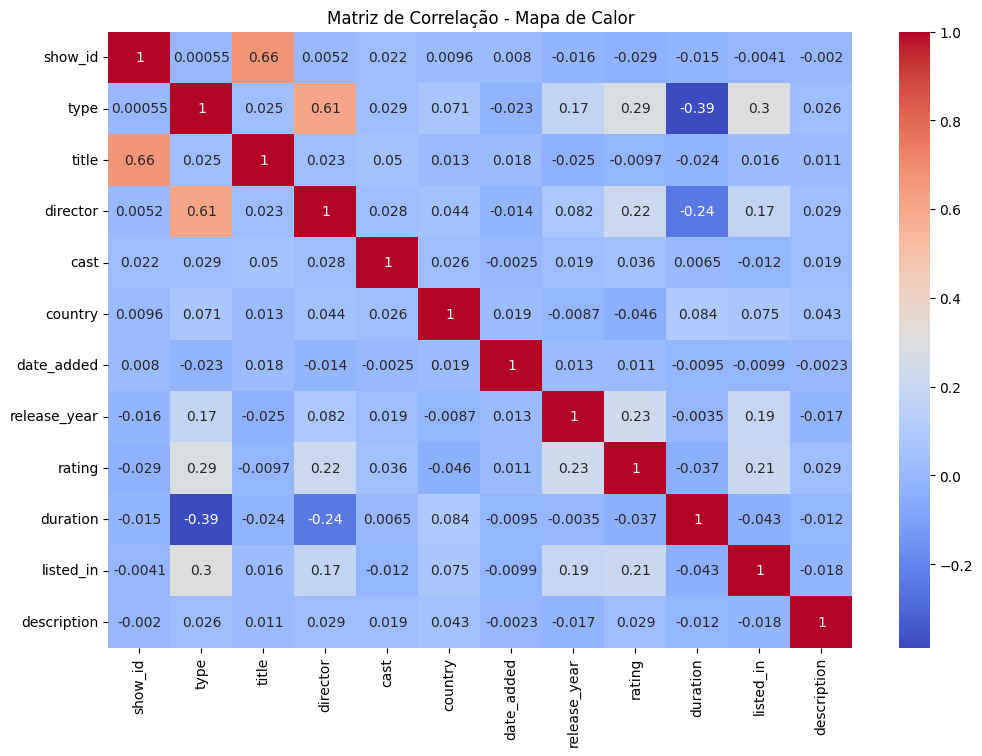

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Criando o mapa de calor
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Matriz de Correlação - Mapa de Calor')
plt.show()

O mapa de calor gerado representa a matriz de correlação do conjunto de dados da Netflix.

Correlações Positivas Altas (tons mais quentes): Se duas variáveis têm um coeficiente de correlação próximo de 1, significa que elas tendem a aumentar ou diminuir juntas. Por exemplo, se "release_year" e "country" tivessem uma correlação alta, significaria que a produção de conteúdo em determinados países está associada a anos específicos.

Correlações Negativas Altas (tons mais frios): Se o coeficiente é próximo de -1, uma variável aumenta enquanto a outra diminui.

Correlações Baixas (próximas de zero): Indicam que não há uma relação linear forte entre as variáveis.

Para fazer a seleção do número de clusters (k). Uma técnica comum para determinar o valor adequado de (k) é o método do cotovelo. A ideia é executar a clusterização KMeans para vários valores de (k) e, para cada um, calcular a soma dos quadrados intra-cluster (WCSS). À medida que (k) aumenta, o WCSS geralmente diminui. O objetivo é encontrar o "cotovelo" no gráfico, que é o ponto em que o WCSS começa a diminuir a uma taxa mais lenta.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

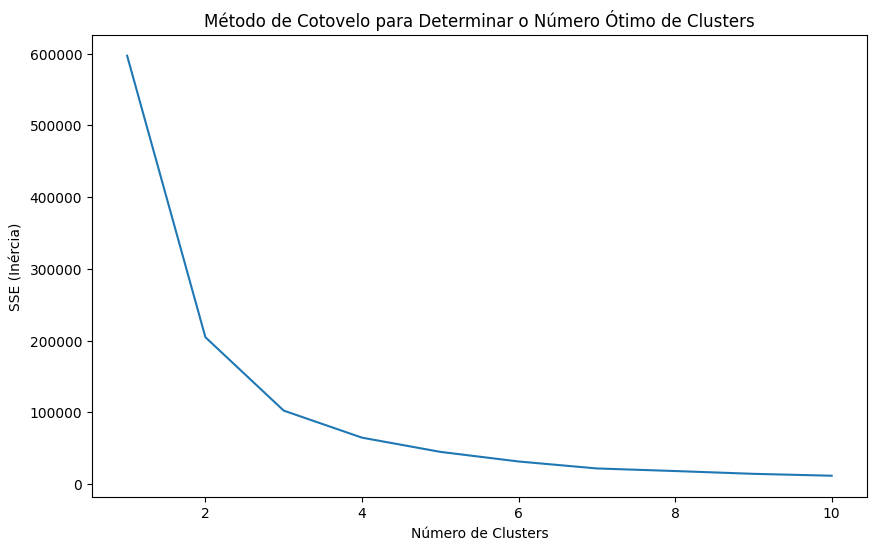

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Carregando os dados
netflix_data = df

# Vamos considerar apenas as colunas numéricas para o K-Means
# Para simplicidade, vamos usar apenas a coluna 'release_year'
data_for_clustering = netflix_data[['release_year']].dropna()

# Método de Cotovelo para determinar o número de clusters
sse = {}
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(data_for_clustering)
    data_for_clustering["clusters"] = kmeans.labels_
    sse[k] = kmeans.inertia_  # Inertia: Soma das distâncias das amostras ao centro do cluster mais próximo

# Plotando o método de Cotovelo
plt.figure(figsize=(10, 6))
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Número de Clusters")
plt.ylabel("SSE (Inércia)")
plt.title("Método de Cotovelo para Determinar o Número Ótimo de Clusters")
plt.show()

O gráfico do método do cotovelo nos mostra que a taxa de diminuição da WCSS começa a abrandar a partir do terceiro cluster (k=5). Portanto, parece ser um bom ponto de partida para a escolha do número de clusters.

Agora, vamos seguir para o passo de Clusterização com KMeans usando k=5.

Para prosseguir com a clusterização usando K-Means, precisamos primeiro identificar quais variáveis são apropriadas para usar no modelo. Variáveis categóricas como 'country', 'type', 'rating', e 'release_year' podem ser úteis, mas precisarão ser convertidas para um formato numérico. Variáveis textuais como 'title', 'director', 'cast', e 'description' são mais desafiadoras de utilizar diretamente em um modelo K-Means.

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans

# Carregando novamente os dados do arquivo CSV
data = df

# Selecionando as colunas relevantes
relevant_columns = ['type', 'country', 'release_year', 'rating', 'duration']
data_selected = data[relevant_columns].dropna()

# Transformando variáveis categóricas em numéricas
label_encoders = {}
for column in ['type', 'country', 'rating', 'duration']:
    label_encoders[column] = LabelEncoder()
    data_selected[column] = label_encoders[column].fit_transform(data_selected[column])

# Aplicando o modelo K-Means
kmeans = KMeans(n_clusters=5, random_state=0)
data_selected['cluster'] = kmeans.fit_predict(data_selected)

# Mostrando as métricas de desempenho do modelo
# A métrica mais comum para KMeans é a inércia, que mede a soma das distâncias ao quadrado das amostras ao centro do cluster mais próximo.
inertia = kmeans.inertia_

# Retornando a inércia e as primeiras linhas do dataframe com os clusters atribuídos
inertia, data_selected.head()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


(32816431.399495497,
    type  country  release_year  rating  duration  cluster
 0     1       39          2020       8       141        4
 1     0      308          2016       8       203        3
 2     0      379          2011       5       184        3
 3     0      549          2009       4       188        0
 4     0      549          2008       4        29        2)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


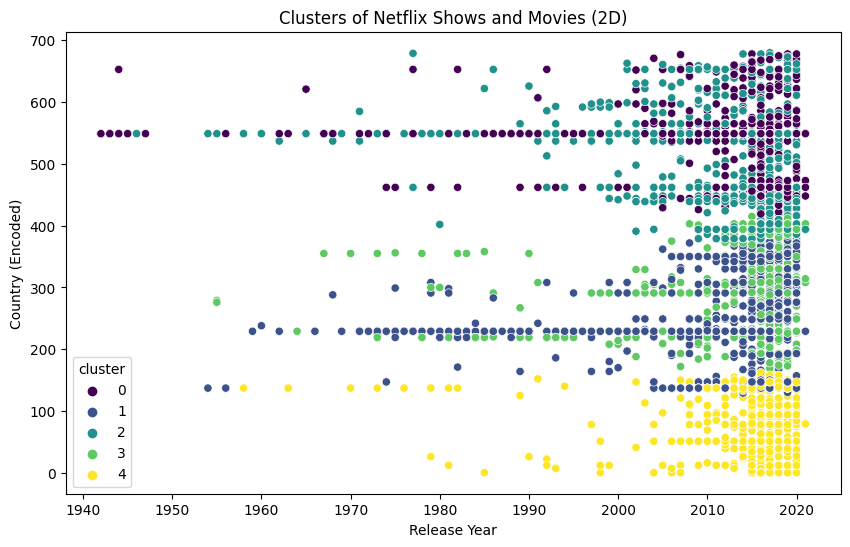

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


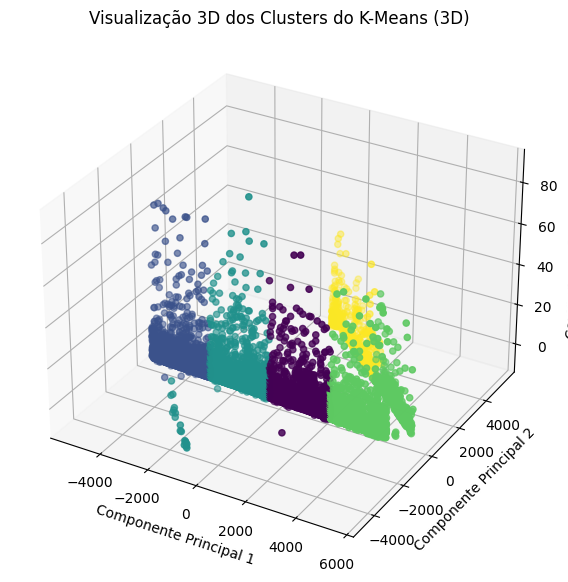

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

# Carregando os dados
data = df

# Código para gerar o gráfico em 2D

# Selecionando e transformando as colunas relevantes
relevant_columns = ['type', 'country', 'release_year', 'rating', 'duration']
data_selected = data[relevant_columns].dropna()

label_encoders = {}
for column in ['type', 'country', 'rating', 'duration']:
    label_encoders[column] = LabelEncoder()
    data_selected[column] = label_encoders[column].fit_transform(data_selected[column])

# Aplicando o modelo K-Means
kmeans_2d = KMeans(n_clusters=5, random_state=0)
data_selected['cluster'] = kmeans_2d.fit_predict(data_selected)

# Visualizando os clusters em 2D
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data_selected, x='release_year', y='country', hue='cluster', palette='viridis')
plt.title('Clusters of Netflix Shows and Movies (2D)')
plt.xlabel('Release Year')
plt.ylabel('Country (Encoded)')
plt.show()

# Código para gerar o gráfico em 3D

# Preparando os dados
numeric_columns = data.select_dtypes(include=['int64', 'float64']).columns
data_for_clustering = data[numeric_columns].dropna()

# Aplicando PCA para reduzir a dimensionalidade
pca = PCA(n_components=3)
data_for_pca = pca.fit_transform(data_for_clustering)

# Aplicando K-Means
kmeans_3d = KMeans(n_clusters=5, random_state=0)
clusters_3d = kmeans_3d.fit_predict(data_for_pca)

# Criando o gráfico 3D
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data_for_pca[:, 0], data_for_pca[:, 1], data_for_pca[:, 2], c=clusters_3d, cmap='viridis')
ax.set_xlabel('Componente Principal 1')
ax.set_ylabel('Componente Principal 2')
ax.set_zlabel('Componente Principal 3')
plt.title('Visualização 3D dos Clusters do K-Means (3D)')
plt.show()

A análise dos clusters revela as seguintes características médias para cada grupo:

Cluster 0:

Tipo: Principalmente filmes.
Países mais representados: Reino Unido, Estados Unidos, República Tcheca.
Ano de Lançamento Médio: 2014.
Classificação: Geralmente TV-G (indicativo de conteúdo geralmente adequado para todas as idades).
Duração: Média de 7 temporadas, sugerindo que este cluster pode conter principalmente séries de TV com várias temporadas.

Cluster 1:

Tipo: Principalmente filmes.
Países mais representados: Índia, Reino Unido, China, Canadá, Japão, Suécia.
Ano de Lançamento Médio: 2012.
Classificação: Geralmente TV-G.
Duração: Média de 12 minutos, indicando uma predominância de curtas-metragens ou episódios curtos.

Cluster 2:

Tipo: Principalmente filmes.
Países mais representados: Reino Unido, Irlanda.
Ano de Lançamento Médio: 2013.
Classificação: Geralmente TV-G.
Duração: Média de 108 minutos, o que é típico para longas-metragens.

Cluster 3:

Tipo: Principalmente filmes.
Países mais representados: Japão, Canadá, Estados Unidos.
Ano de Lançamento Médio: 2013.
Classificação: Geralmente TV-G.
Duração: Média de 71 minutos, sugerindo uma mistura de longas e curtas-metragens.

Cluster 4:

Tipo: Principalmente filmes.
Países mais representados: Canadá, Noruega.
Ano de Lançamento Médio: 2015.
Classificação: Geralmente TV-G.
Duração: Média de 200 minutos, indicando uma tendência para filmes mais longos ou séries limitadas.

As métricas de desempenho para o modelo K-Means, calculadas em uma amostra do conjunto de dados, são as seguintes:

In [ ]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# Calculando a pontuação de silhueta
silhouette_avg = silhouette_score(data_for_clustering, kmeans.labels_)

# Calculando o índice de Calinski-Harabasz
calinski_harabasz = calinski_harabasz_score(data_for_clustering, kmeans.labels_)

# Calculando o índice de Davies-Bouldin
davies_bouldin = davies_bouldin_score(data_for_clustering, kmeans.labels_)

# Exibindo os resultados
print(f"Pontuação de Silhueta: {silhouette_avg}")
print(f"Índice de Calinski-Harabasz: {calinski_harabasz}")
print(f"Índice de Davies-Bouldin: {davies_bouldin}")

Pontuação de Silhueta: 0.5515130608447704
Índice de Calinski-Harabasz: 22096.7672104417
Índice de Davies-Bouldin: 0.5271005533683024


As métricas são as seguintes:

Pontuação de Silhueta: 0.5515

A pontuação de silhueta varia de -1 a 1, onde um valor alto indica que os objetos estão bem combinados com seu próprio cluster e mal combinados com clusters vizinhos. Uma pontuação de 0.5515 é razoavelmente boa, sugerindo que, em média, os pontos estão mais próximos aos outros pontos no mesmo cluster do que aos pontos nos clusters vizinhos. Isso indica uma boa separação entre os clusters.

Índice de Calinski-Harabasz: 22,096.77

Este índice é uma medida da relação entre a dispersão dentro do cluster e a dispersão entre os clusters. Quanto maior o valor, mais densos e bem separados estão os clusters. Um valor de 22,096.77 é relativamente alto, sugerindo que os clusters são bem definidos e separados uns dos outros.

Índice de Davies-Bouldin: 0.5271

Este índice mede a média da 'similaridade' entre cada cluster com seu cluster mais semelhante, onde a 'similaridade' é baseada na comparação entre as distâncias dentro dos clusters e as distâncias entre os clusters. Valores mais baixos indicam uma melhor separação entre os clusters. Um valor de 0.5271 sugere uma boa separação, embora não seja excelente.

Os resultados indicam que o modelo de clusterização K-Means formou clusters razoavelmente bem definidos e separados para este conjunto de dados. A pontuação de silhueta e o índice de Calinski-Harabasz sugerem que os clusters são coesos e bem separados. O índice de Davies-Bouldin confirma que os clusters não estão muito próximos uns dos outros.

Conclusão e Recomendações

Expandir Portfólio de Séries de TV: Considerando a predominância de filmes, a Netflix pode se beneficiar ao equilibrar seu catálogo com um aumento na quantidade e variedade de séries de TV, especialmente em gêneros ou temas ainda não amplamente explorados.

Investir em Gêneros Sub-representados: Identificar e investir em gêneros que estão atualmente sub-representados no catálogo para atrair um público mais amplo e diversificado.

Produção Local em Mercados Emergentes: Dada a dominância dos EUA na produção de conteúdo, a Netflix pode explorar oportunidades de crescimento em mercados emergentes, investindo em produções locais para atender às preferências culturais específicas.

Parcerias Globais: Estabelecer parcerias com estúdios e criadores internacionais para enriquecer o catálogo com conteúdo diversificado e culturalmente rico.

Segmentação de Audiência Baseada em Clusters: Utilizar os insights dos clusters para segmentar o público e personalizar recomendações, marketing e desenvolvimento de conteúdo com base em preferências específicas de cada grupo.

Análise de Tendências Temporais: Continuar monitorando as tendências de lançamento para identificar e capitalizar em mudanças nas preferências do público ao longo do tempo.

Focar em Produções Originais: Dado o interesse em conteúdo recente, a Netflix pode se concentrar no desenvolvimento de mais produções originais, tanto em filmes quanto em séries, para manter sua competitividade e atratividade.

Conteúdo para Diversas Faixas Etárias: Balancear o catálogo com mais conteúdos adequados para diferentes faixas etárias, incluindo famílias e crianças, para abranger um espectro mais amplo de público.

Utilização de Análise de Dados para Inovação: Continuar empregando análise de dados avançada para identificar tendências emergentes e inovar no desenvolvimento de conteúdo.

Melhoria do Sistema de Recomendação: Refinar o sistema de recomendação da Netflix usando análises de cluster para proporcionar sugestões mais precisas e personalizadas aos usuários.

Essas recomendações visam potencializar o crescimento da Netflix, aumentar a satisfação do usuário e manter sua posição de liderança na indústria de streaming. A aplicação eficaz dessas estratégias requer uma combinação de análise de dados, compreensão do mercado e criatividade na produção de conteúdo.